In [151]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


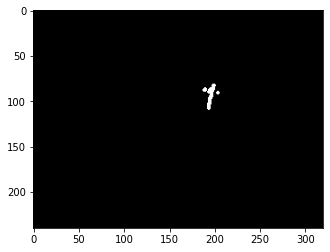

In [152]:
markImg = iio.imread('imgs/markings-2022-04-27 18:04:55.202884.png')
marcas = np.zeros(markImg.shape)
c = input("Introduce marca a observar")
if c == 'r':
    marcas[np.where((markImg[:, :, 0] == 255) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 0))] = [255, 255, 255]
elif c == 'g':
     marcas[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 255) & (markImg[:, :, 2] == 0))] = [255, 255, 255]
else:
      marcas[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 255))] = [255, 255, 255]
plt.imshow(marcas)
plt.show()

In [218]:
# Leo las imagenes de entrenamiento
imNp = iio.imread('imgs/true-2022-04-27 18:04:55.202884.png')
markImg = iio.imread('imgs/markings-2022-04-27 18:04:55.202884.png')

In [220]:
# Almaceno los valores RGB de 'imNp' que fuero marcados en 'markImg' en rojo verde y azul
data_marca = imNp[np.where((markImg[:, :, 0] == 255) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 0))]
data_fondo = imNp[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 255) & (markImg[:, :, 2] == 0))]
data_linea = imNp[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 255))]

/tmp/ipykernel_456097/405695163.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0.92, 'Espacio RGB')

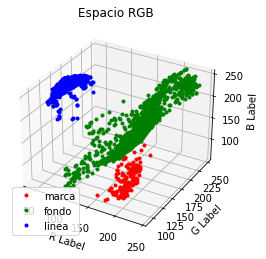

In [221]:
# Pinto los datos RGB
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(data_marca[:,0],data_marca[:,1],data_marca[:,2],'r.',label='marca')
ax.plot(data_fondo[:,0],data_fondo[:,1],data_fondo[:,2],'g.',label='fondo')
ax.plot(data_linea[:,0],data_linea[:,1],data_linea[:,2],'b.',label='linea')
ax.set_xlabel('R Label')
ax.set_ylabel('G Label')
ax.set_zlabel('B Label')
ax.legend()
plt.title('Espacio RGB')

In [156]:
# Ahora haglo lo mismo con los datos normalizados segun la 'normalizacion rgb'

imNpC = np.array(imNp, dtype=np.int64)
sum = [(imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2]), (imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2]), (imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2])]
sum = np.moveaxis(sum, [0], [-1])

imrgbn = imNpC/sum

In [214]:
def normalizar_imagen(imagen):
    imNpC = np.array(imagen, dtype=np.int64)
    sum = [(imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2]), (imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2]), (imNpC[:,:,0]+imNpC[:,:,1]+imNpC[:,:,2])]
    sum = np.moveaxis(sum, [0], [-1])
    imNpC = imNpC/sum
    imNpC[:,:,2] = 1 - imNpC[:,:,0] -imNpC[:,:,1]
    return imNpC

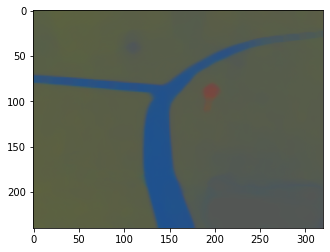

In [219]:
import cv2
imgrbn = normalizar_imagen(cv2.medianBlur(imNp, 13))
plt.imshow(imgrbn)
plt.show()


In [196]:

# Almaceno los valores RGB de 'imrgbn' que fueron marcados en 'markImg' en rojo verde y azul
data_marca_n = imrgbn[np.where((markImg[:, :, 0] == 255) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 0))]
data_fondo_n = imrgbn[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 255) & (markImg[:, :, 2] == 0))]
data_linea_n = imrgbn[np.where((markImg[:, :, 0] == 0) & (markImg[:, :, 1] == 0) & (markImg[:, :, 2] == 255))]

Text(0.5, 1.0, 'Espacio RGB normalizado')

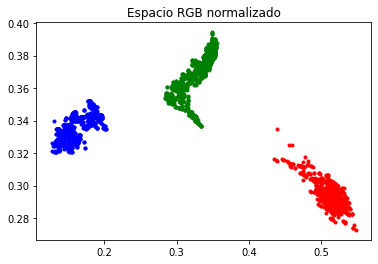

In [222]:
plt.figure()
plt.plot(data_marca_n[:,0],data_marca_n[:,1],'r.',label='marca')
plt.plot(data_fondo_n[:,0],data_fondo_n[:,1],'g.',label='fondo')
plt.plot(data_linea_n[:,0],data_linea_n[:,1],'b.',label='linea')
plt.title('Espacio RGB normalizado')

In [223]:
import pandas as pd
linea = pd.DataFrame(data_linea_n[:,0:2], columns=['r', 'g'])
marca = pd.DataFrame(data_marca_n[:,0:2], columns=['r', 'g'])
suelo = pd.DataFrame(data_fondo_n[:,0:2], columns=['r', 'g'])

linea['clase'] = 0
marca['clase'] = 1
suelo['clase'] = 2

In [199]:
df = pd.concat([linea, marca, suelo], axis=0)

In [200]:
df.clase.value_counts()

2    2221
0    1448
1    1444
Name: clase, dtype: int64

In [201]:
df_smote = df

In [224]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)

df_smote, clase_smote = sampler.fit_resample(df.drop(columns=['clase']), df.clase)

In [225]:
df_smote['clase'] = clase_smote
df_smote.clase.value_counts()

0    2221
1    2221
2    2221
Name: clase, dtype: int64

In [204]:
df_smote.to_csv("etiquetas2-medianblur.csv", index=False)

Text(0.5, 1.0, 'Espacio RGB normalizado sintético mediante oversampling')

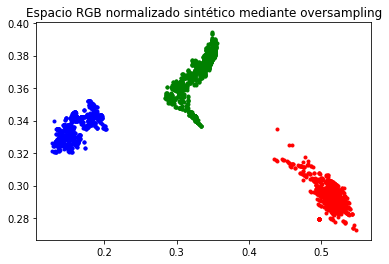

In [205]:
plt.figure()
plt.plot(df_smote[df_smote.clase==1].r,df_smote[df_smote.clase==1].g,'r.',label='marca')
plt.plot(df_smote[df_smote.clase==2].r,df_smote[df_smote.clase==2].g,'g.',label='fondo')
plt.plot(df_smote[df_smote.clase==0].r,df_smote[df_smote.clase==0].g,'b.',label='linea')
plt.title('Espacio RGB normalizado sintético mediante oversampling')

In [206]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_validate

clf = QuadraticDiscriminantAnalysis()
cv_results = cross_validate(clf, df_smote.drop(columns=['clase']), df_smote.clase, cv=3)

In [207]:
print("Cross Validation:")
print("score: ",np.mean(cv_results['test_score'])*100,", Std: ", np.std(cv_results['test_score']))

Cross Validation:
score:  95.76767221972085 , Std:  0.05985415347279197


In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_smote.drop(columns=['clase']), df_smote.clase, test_size=0.20, random_state=42, shuffle=True)

In [227]:
from sklearn.neighbors import KNeighborsClassifier
clf = QuadraticDiscriminantAnalysis()

clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, )
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [86]:
def etiquetar_imagen(clf, imagen):
    shape0 = imagen.shape[0]
    shape1 = imagen.shape[1]
    img = imagen.reshape(imagen.shape[0]*imagen.shape[1], 3)
    predictions = clf.predict(img[:, 0:2])
    return predictions.reshape(shape0, shape1)

In [82]:
imagen = iio.imread('imgs/true-2022-03-24 16:35:03.975636.png')
etiquetas = etiquetar_imagen(clf, normalizar_imagen(imagen))

shape =  240   320


/home/dani/.config/JetBrains/JetBrainsDS2021.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [212]:
def pintar_prediccion(prediccion):
    paint = np.zeros((prediccion.shape[0], prediccion.shape[1], 3))
    paint[np.where(prediccion == 0)] = [0, 0, 255]
    paint[np.where(prediccion == 1)] = [255, 0, 0]
    paint[np.where(prediccion == 2)] = [0, 255, 0]
    # plt.imshow(paint)
    # plt.show()
    return paint
pintar_prediccion(etiquetas)

array([[[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        ...,
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.]],

       [[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        ...,
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.]],

       [[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        ...,
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.]],

       ...,

       [[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        ...,
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.]],

       [[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        ...,
        [  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 255.,   0.]],

       [[  0., 255.,   0.],
        [  0., 255.,   0.],
        [  0., 2

In [215]:
def procesarimagen(imagen, clf):
    norm = normalizar_imagen(imagen)
    pred = etiquetar_imagen(clf, norm)
    return pintar_prediccion(pred)

In [216]:
import cv2
import datetime

def etiqueta_video(videopath, clf):
    init_time = datetime.datetime.now()
    ct = str(datetime.datetime.now())
    capture = cv2.VideoCapture(videopath)
    fps = capture.get(cv2.CAP_PROP_FPS)
    width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    height =  int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter('video'+ct+'.avi', fourcc, fps, (width, height))
    while capture.isOpened():
        ret, frame = capture.read()
        if ret == False:
            break
        processed_img = procesarimagen(frame, clf)
        video.write(np.uint8(processed_img))

    cv2.destroyAllWindows()
    video.release()
    print("Tiempo de proceso = ", datetime.datetime.now()-init_time)

In [228]:
etiqueta_video("/home/dani/Escritorio/proyectos/Python/clase/robotica/Robotica/codigo_alumnos2021/segmentacion/video2017-3.avi",  clf)

/home/dani/.config/JetBrains/JetBrainsDS2021.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/dani/.config/JetBrains/JetBrainsDS2021.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/dani/.config/JetBrains/JetBrainsDS2021.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/dani/.config/JetBrains/JetBrainsDS2021.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/dani/.config/JetBrains/Jet

KeyboardInterrupt: 